# MathTool HW5
2024-11-21

## Question 2

### a)

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [135]:
# Parameters
lambda_1, mu_1, sigma_1 = 0.05, 5, 2  #PMF1
lambda_2, mu_2, sigma_2 = 0.05, 4, 3  #PMF2
I_values = np.linspace(1, 10, 100)

#PMF1
Phi_1 = norm.cdf(I_values, loc=mu_1, scale=sigma_1)
p_I_1 = lambda_1 * 0.5 + (1 - lambda_1) * Phi_1

#PMF2
Phi_2 = norm.cdf(I_values, loc=mu_2, scale=sigma_2)
p_I_2 = lambda_2 * 0.5 + (1 - lambda_2) * Phi_2

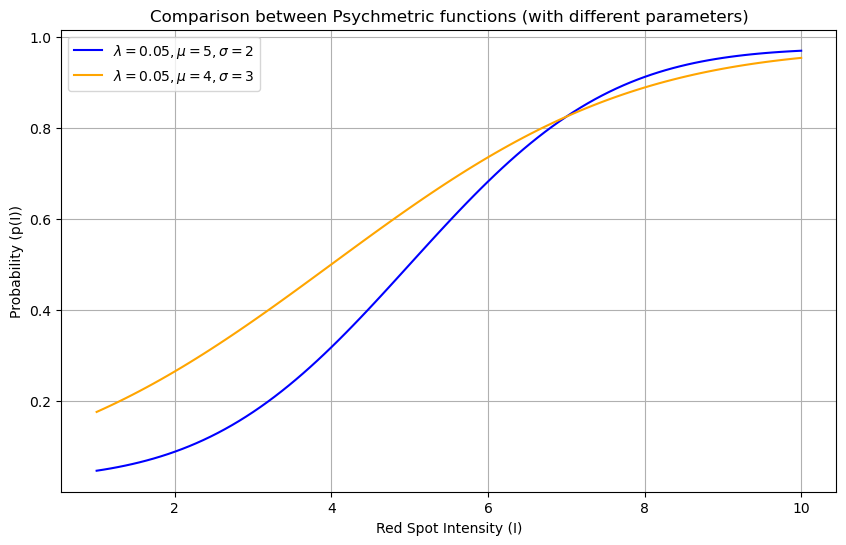

In [136]:
plt.figure(figsize=(10, 6))
plt.plot(I_values, p_I_1, label=r"$\lambda=0.05, \mu=5, \sigma=2$", color="blue")
plt.plot(I_values, p_I_2, label=r"$\lambda=0.05, \mu=4, \sigma=3$", color="orange")
plt.xlabel("Red Spot Intensity (I)")
plt.ylabel("Probability (p(I))")
plt.title("Comparison between Psychmetric functions (with different parameters)")
plt.legend()
plt.grid()
plt.show()

Increasing µ is shifting the curve to the right, which reflects a higher intensity threshold for red to match the blue.
Increasing σ is making the curve shallower and wider, which indicates that there are more noise or uncertainty in making decisions. 

The range of p(I) will be:
$p(I) \in \left[\lambda \cdot \frac{1}{2}, 1 - \lambda \cdot \frac{1}{2}\right]$.
When λ=0.05, the range of p(I) is [0.025,0.975].

This range is appropriate for following reasons:
1. the lapse rate ensures that p(I) does not saturate to exactly 0 or 1, which is mimicing a real human behavior, assuming that there is always a small probability that some of the response of the observer is based on guess.
2. Also, this range is refelcting that human behavior can not always be consistant all the time. 


### b)

In [137]:
def simpsych(lambda_, mu, sigma, I, T):
    #lambda: lapse rate
    #mu: mean
    #sigma: sd
    #T:number of trials for each intensity

    Phi = norm.cdf(I, loc=mu, scale=sigma)
    p_I = lambda_ * 0.5 + (1 - lambda_) * Phi

    #the response is binary
    B = np.array([np.sum(np.random.rand(t) < p) for p, t in zip(p_I, T)])
    return B

In [138]:
#Testing
lambda_ = 0.05
mu = 4
sigma = 1
I = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Intensities
T = np.array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20])  # 20 trials per intensity

In [139]:
B = simpsych(lambda_, mu, sigma, I, T)
print("Number of 'red is brighter' responses in each intensity level:", B)

Number of 'red is brighter' responses in each intensity level: [ 0  0  6 15 14 20 20 19 19 20]


### c)

In [140]:
lambda_ = 0.05
mu = 4
sigma = 1
I = np.array([1, 2, 3, 4, 5, 6, 7])
T = np.array([100, 100, 100, 100, 100, 100, 100])
B = simpsych(lambda_, mu, sigma, I, T)
proportions = B / T


In [141]:
Phi = norm.cdf(I, loc=mu, scale=sigma)
p_I = lambda_ * 0.5 + (1 - lambda_) * Phi

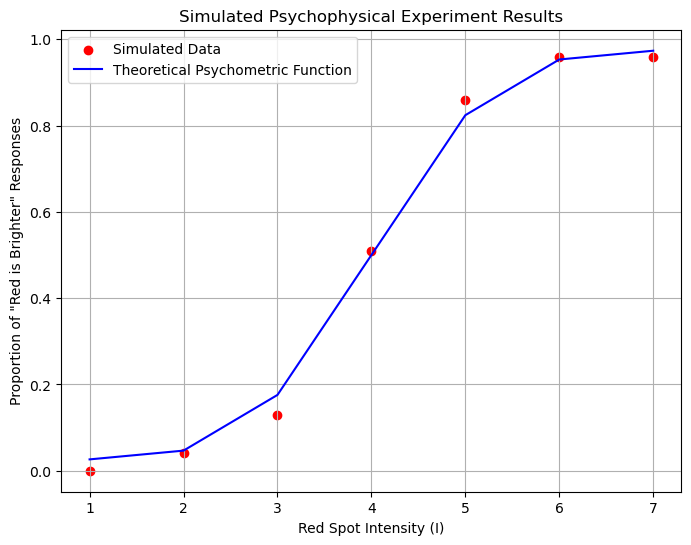

In [142]:
plt.figure(figsize=(8, 6))
plt.scatter(I, proportions, color='red', label='Simulated Data')
plt.plot(I, p_I, color='blue', label='Theoretical Psychometric Function')
plt.xlabel('Red Spot Intensity (I)')
plt.ylabel('Proportion of "Red is Brighter" Responses')
plt.title('Simulated Psychophysical Experiment Results')
plt.legend()
plt.grid(True)
plt.show()

### d)

In [143]:
I_d = np.arange(1, 8)
T_d = np.array([10, 10, 10, 10, 10, 10, 10])
B_d = simpsych(lambda_, mu, sigma, I_d, T_d)

In [144]:
proportions_d = B_d / T_d

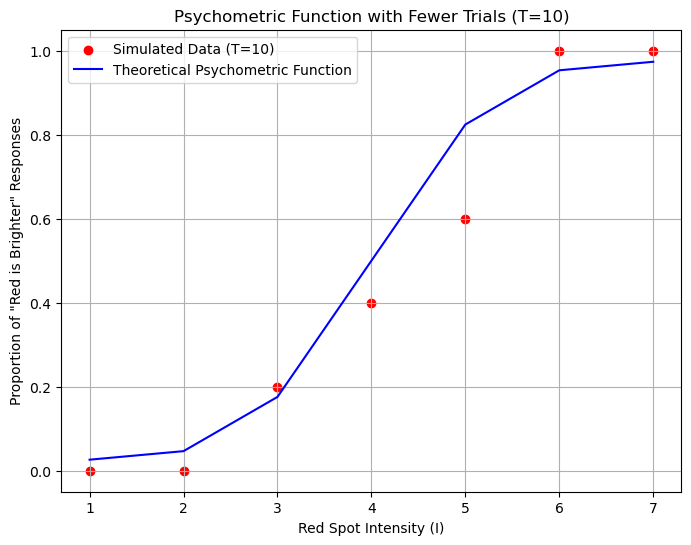

In [145]:
plt.figure(figsize=(8, 6))
plt.scatter(I_d, proportions_d, color='red', label='Simulated Data (T=10)')
plt.plot(I_d, p_I, color='blue', label='Theoretical Psychometric Function')
plt.xlabel('Red Spot Intensity (I)')
plt.ylabel('Proportion of "Red is Brighter" Responses')
plt.title('Psychometric Function with Fewer Trials (T=10)')
plt.legend()
plt.grid(True)
plt.show()

The reuslts when T=ones(1,7)*10 are not the same. 
With fewer trials per intensity (T=10), the simulated proportions (B/T) will show greater variability (more noise) compared to T=100.
Also, the points will be more scattered, deviating more from the theoretical curve due to increased randomness. But the theoretical psychometric function remains unchanged. 

Increasing the number of trials per intensity reduces variability and improves the reliability of the psychometric function estimate.

### e)

In [146]:
lambda_e = 0.05
sigma_e = 1

In [147]:
B_100 = simpsych(lambda_e, 4, sigma_e, I, T)
B_10 = simpsych(lambda_e, 4, sigma_e, I_d, T_d)

In [148]:
mu_values = np.arange(1, 7.1, 0.1)
mu_values

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

In [149]:
log_likelihoods_10 = []
log_likelihoods_100 = []
for mu in mu_values:
    #10
    Phi_10 = norm.cdf(I_d, loc=mu, scale=sigma_e)
    p_I_10 = lambda_e * 0.5 + (1 - lambda_e) * Phi_10

    p_I_10 = np.clip(p_I_10, 1e-10, 1 - 1e-10) # Avoid log(0)

    log_L_10 = np.sum(B_10 * np.log(p_I_10) + (T_d - B_10) * np.log(1 - p_I_10))
    log_likelihoods_10.append(log_L_10)

    #100
    Phi_100 = norm.cdf(I, loc=mu, scale=sigma_e)
    p_I_100 = lambda_ * 0.5 + (1 - lambda_) * Phi_100

    p_I_100 = np.clip(p_I_100, 1e-10, 1 - 1e-10)

    log_L_100 = np.sum(B_100 * np.log(p_I_100) + (T - B_100) * np.log(1 - p_I_100))
    log_likelihoods_100.append(log_L_100)


In [150]:
log_likelihoods_10 = np.array(log_likelihoods_10)
mle_mu_10 = mu_values[np.argmax(log_likelihoods_10)]

log_likelihoods_100 = np.array(log_likelihoods_100)
mle_mu_100 = mu_values[np.argmax(log_likelihoods_100)]

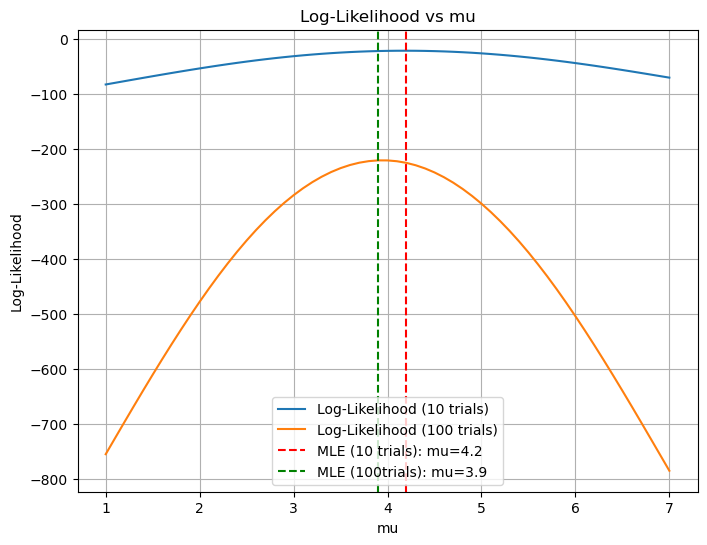

The MLE for mu (under 10 trials per condition)is approximately: 4.20
The MLE for mu (under 100 trials per condition)is approximately: 3.90


In [151]:
plt.figure(figsize=(8, 6))
plt.plot(mu_values, log_likelihoods_10, label='Log-Likelihood (10 trials)')
plt.plot(mu_values, log_likelihoods_100, label='Log-Likelihood (100 trials)')
plt.axvline(mle_mu_10, color='red', linestyle='--', label=f'MLE (10 trials): mu={mle_mu_10:.1f}')
plt.axvline(mle_mu_100, color='green', linestyle='--', label=f'MLE (100trials): mu={mle_mu_100:.1f}')
plt.xlabel('mu')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs mu')
plt.legend()
plt.grid(True)
plt.show()

print(f"The MLE for mu (under 10 trials per condition)is approximately: {mle_mu_10:.2f}")
print(f"The MLE for mu (under 100 trials per condition)is approximately: {mle_mu_100:.2f}")

### f)

In [152]:
mu_values = np.arange(1, 7.1, 0.1)
sigma_values = np.arange(0.1, 2.6, 0.1)

In [153]:
log_likelihoods_10 = np.zeros((len(mu_values), len(sigma_values)))
log_likelihoods_100 = np.zeros((len(mu_values), len(sigma_values)))

In [154]:
for i, mu in enumerate(mu_values):
    for j, sigma in enumerate(sigma_values):
        # For 10 trials
        Phi_10 = norm.cdf(I_d, loc=mu, scale=sigma)
        p_I_10 = lambda_e * 0.5 + (1 - lambda_e) * Phi_10
        p_I_10 = np.clip(p_I_10, 1e-10, 1 - 1e-10)
        log_L_10 = np.sum(B_10 * np.log(p_I_10) + (T_d - B_10) * np.log(1 - p_I_10))
        log_likelihoods_10[i, j] = log_L_10

        # For 100 trials
        Phi_100 = norm.cdf(I, loc=mu, scale=sigma)
        p_I_100 = lambda_e * 0.5 + (1 - lambda_e) * Phi_100
        p_I_100 = np.clip(p_I_100, 1e-10, 1 - 1e-10)
        log_L_100 = np.sum(B_100 * np.log(p_I_100) + (T - B_100) * np.log(1 - p_I_100))
        log_likelihoods_100[i, j] = log_L_100

In [155]:
max_idx_10 = np.unravel_index(np.argmax(log_likelihoods_10), log_likelihoods_10.shape)
mle_mu_10 = mu_values[max_idx_10[0]]
mle_sigma_10 = sigma_values[max_idx_10[1]]

max_idx_100 = np.unravel_index(np.argmax(log_likelihoods_100), log_likelihoods_100.shape)
mle_mu_100 = mu_values[max_idx_100[0]]
mle_sigma_100 = sigma_values[max_idx_100[1]]

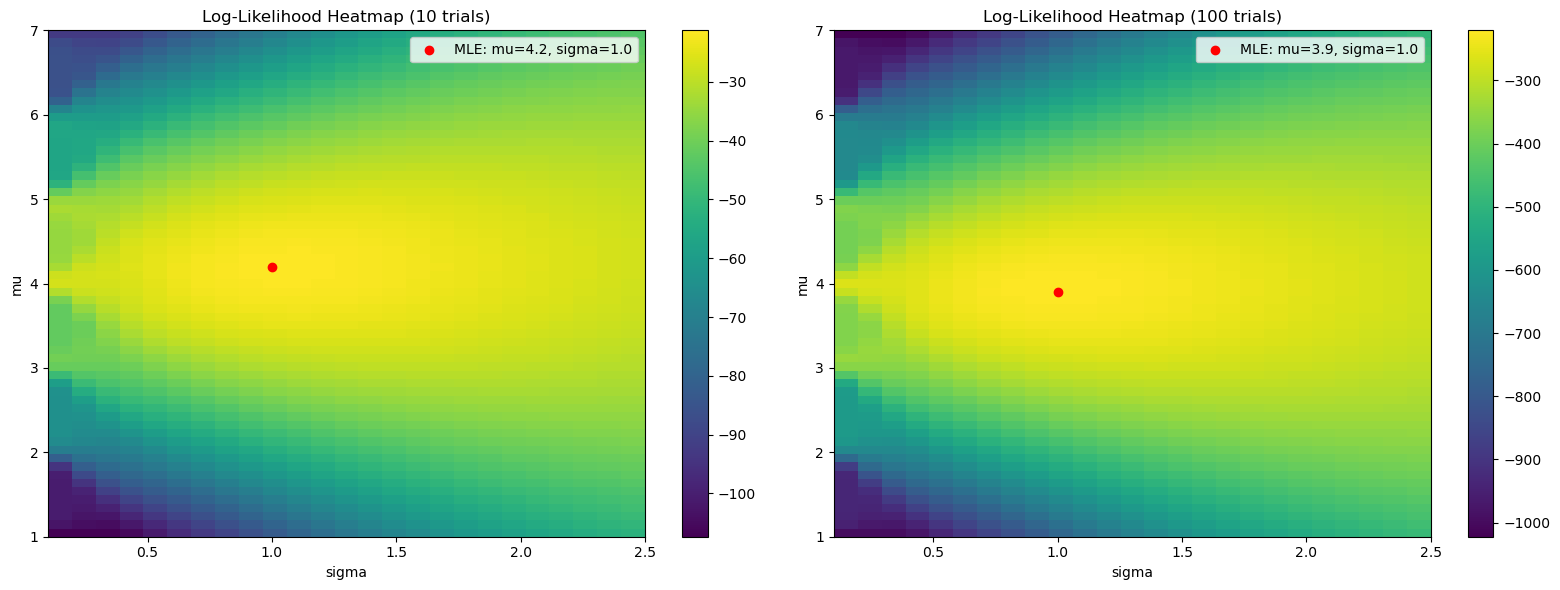

The MLE for mu (10 trials) is approximately: 4.20
The MLE for sigma (10 trials) is approximately: 1.00
The MLE for mu (100 trials) is approximately: 3.90
The MLE for sigma (100 trials) is approximately: 1.00


In [156]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# 10 trials
c1 = ax[0].imshow(log_likelihoods_10, extent=[sigma_values[0], sigma_values[-1], mu_values[0], mu_values[-1]],
                  origin='lower', aspect='auto', cmap='viridis')
fig.colorbar(c1, ax=ax[0])
ax[0].scatter(mle_sigma_10, mle_mu_10, color='red', label=f'MLE: mu={mle_mu_10:.1f}, sigma={mle_sigma_10:.1f}')
ax[0].set_xlabel('sigma')
ax[0].set_ylabel('mu')
ax[0].set_title('Log-Likelihood Heatmap (10 trials)')
ax[0].legend()

# 100 trials
c2 = ax[1].imshow(log_likelihoods_100, extent=[sigma_values[0], sigma_values[-1], mu_values[0], mu_values[-1]],
                  origin='lower', aspect='auto', cmap='viridis')
fig.colorbar(c2, ax=ax[1])
ax[1].scatter(mle_sigma_100, mle_mu_100, color='red', label=f'MLE: mu={mle_mu_100:.1f}, sigma={mle_sigma_100:.1f}')
ax[1].set_xlabel('sigma')
ax[1].set_ylabel('mu')
ax[1].set_title('Log-Likelihood Heatmap (100 trials)')
ax[1].legend()

plt.tight_layout()
plt.show()

print(f"The MLE for mu (10 trials) is approximately: {mle_mu_10:.2f}")
print(f"The MLE for sigma (10 trials) is approximately: {mle_sigma_10:.2f}")
print(f"The MLE for mu (100 trials) is approximately: {mle_mu_100:.2f}")
print(f"The MLE for sigma (100 trials) is approximately: {mle_sigma_100:.2f}")